# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Université de Toulon</span>

Une fois que l'on dispose de sa liste de DOI nettoyée (voir le notebook "nettoyage_donnees"), il est à présent temps d'appliquer le code du Baromètre national de la Science Ouverte aux données de son propre établissement. Il suffit de remplacer "toulon" par le nom de son établissement à l'intérieur du code.

## <span style="color:orange">Importer les scripts</span>

Adresse :  https://github.com/MinistereSupRecherche/bso

S'ils n'y sont pas, copier dans son propre répertoire à la racine les fichiers "scanr_utils.py" et "unpwaywall_utils.py". .

In [1]:
from scanr_utils import *
from unpwaywall_utils import *

In [2]:
import pandas as pd

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [3]:
with open("Data/outputs/doi_toulon.csv") as f:
    doi_toulon_str = f.read()

In [4]:
doi_toulon_df = pd.read_csv("Data/outputs/doi_toulon.csv",sep="\t")

In [5]:
doi_toulon_df

,doi
0,10.1103/physrevd.94.123520
1,10.1186/s13068-016-0681-0
2,10.1186/s13068-016-0678-8
3,10.1186/s13640-016-0149-y
4,10.1088/1751-8113/49/49/495202
...,...
3769,10.1109/ijcnn48605.2020.9207145
3770,10.1051/epjconf/202022504009
3771,10.32735/s0718-2201202000050798
3772,10.1109/ic_aset49463.2020.9318261


## <span style="color:orange">Enrichissement avec l'API Unpaywall</span>

On ajoute à la liste de DOI constituée précédemment toutes les informations comprises dans l'API Unpaywall : titre, année, statut d'open access... <span style="color:red">**Attention, le processus peut prendre plusieurs heures la première fois que l'on exécute ce code.**</span>

In [6]:
publis_toulon_oa_status = enrich_with_upw_status(doi_toulon_df)
publis_toulon_oa_status
publis_toulon_oa_status.to_csv("Data/outputs/publis_toulon_oa_status.csv",index=False)

3774 publications
0 %, 1 %, 3 %, 4 %, 5 %, 7 %, 8 %, 9 %, 11 %, 12 %, 13 %, 15 %, 16 %, 17 %, 19 %, 20 %, 21 %, 23 %, 24 %, 25 %, 26 %, 28 %, 29 %, 30 %, 32 %, 33 %, 34 %, 36 %, 37 %, 38 %, 40 %, 41 %, 42 %, 44 %, 45 %, 46 %, 48 %, 49 %, 50 %, 52 %, 53 %, 54 %, 56 %, 57 %, 58 %, 60 %, 61 %, 62 %, 64 %, 65 %, 66 %, 68 %, 69 %, 70 %, 72 %, 73 %, 74 %, 76 %, 77 %, 78 %, 79 %, 81 %, 82 %, 83 %, 85 %, 86 %, 87 %, 89 %, 90 %, 91 %, 93 %, 94 %, 95 %, 97 %, 98 %, 99 %, 

Enregistrer le résultat dans un fichier CSV pour ne pas avoir à refaire ce travail plusieurs fois :

In [7]:
publis_toulon_oa_status = pd.read_csv("Data/outputs/publis_toulon_oa_status.csv")

Avoir le fichier en format Excel lisible par les humains :

In [8]:
publis_toulon_oa_status.to_excel("Data/outputs/publis_toulon_oa_status.xls",index=False)

## <span style="color:orange">Ajouter à la DataFrame le champ "scientific field" pour ajouter le domaine pour chaque DOI grâce au jeu de données du Baromètre</soan>

Le jeu de données est disponible à cette adresse : https://data.enseignementsup-recherche.gouv.fr/explore/dataset/open-access-monitor-france/export/?disjunctive.oa_host_type&disjunctive.year

<span style="color:red">**Il faut le télécharger chaque année et le placer au même endroit (Barometre_SO_toulon -> raw) pour mettre à jour les données.**</span> Attention, s'assurer avant de réaliser cette opération que ce jeu de données a bien été mis à jour par le Ministère (sinon, la plupart des publications auront la discipline "unknown".

### Lire le jeu de données du Baromètre national et le stocker dans une variable

In [9]:
with open("Data/raw/open-access-monitor-france.csv", encoding='utf-8') as f:
    open_access_monitor_france_str = f.read()

In [10]:
open_access_monitor_france_df = pd.read_csv("Data/raw/open-access-monitor-france.csv", encoding='utf-8',sep=";")

### Fusionner la DataFrame Toulon et le jeu de données du Baromètre sur le critère du DOI pour ajouter le champ "scientific field"

In [11]:
df_toulon = pd.merge(publis_toulon_oa_status, open_access_monitor_france_df[['doi', 'scientific_field']], how="left", on="doi")
df_toulon

,doi,oa_type,is_oa,title,published_date,published_year,genre,journal_is_in_doaj,journal_issns,journal_name,publisher,repositories,scientific_field
0,10.1103/physrevd.94.123520,repository,True,Cosmological future singularities in interacti...,2016-12-21,2016.0,journal-article,False,"2470-0010,2470-0029",Physical Review D,American Physical Society (APS),arxiv.org,"Physical sciences, Astronomy"
1,10.1186/s13068-016-0681-0,publisher;repository,True,Hydrogen production by the hyperthermophilic b...,2016-12-01,2016.0,journal-article,True,1754-6834,Biotechnology for Biofuels,Springer Science and Business Media LLC,europepmc.org;www.ncbi.nlm.nih.gov,"Earth, Ecology, \nEnergy and applied biology"
2,10.1186/s13068-016-0678-8,publisher;repository,True,Hydrogen production by the hyperthermophilic b...,2016-12-01,2016.0,journal-article,True,1754-6834,Biotechnology for Biofuels,Springer Science and Business Media LLC,europepmc.org;www.ncbi.nlm.nih.gov,"Earth, Ecology, \nEnergy and applied biology"
3,10.1186/s13640-016-0149-y,publisher;repository,True,Line and circle detection using dense one-to-o...,2016-12-01,2016.0,journal-article,True,1687-5281,EURASIP Journal on Image and Video Processing,Springer Science and Business Media LLC,HAL,Computer and \n information sciences
4,10.1088/1751-8113/49/49/495202,repository,True,Stark resonances in a quantum waveguide with a...,2016-11-16,2016.0,journal-article,False,"1751-8113,1751-8121",Journal of Physics A: Mathematical and Theoret...,IOP Publishing,HAL;arxiv.org,"Physical sciences, Astronomy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,10.1109/ijcnn48605.2020.9207145,repository,True,Robust Training of Vector Quantized Bottleneck...,2020-07-01,2020.0,proceedings-article,False,NaN,2020 International Joint Conference on Neural ...,IEEE,HAL;arxiv.org,NaN
3770,10.1051/epjconf/202022504009,publisher;repository,True,Calibration of a Single-Cell Calorimeter in a ...,2020-01-01,2020.0,journal-article,True,2100-014X,EPJ Web of Conferences,EDP Sciences,www.epj-conferences.org,NaN
3771,10.32735/s0718-2201202000050798,publisher;repository,True,Del posmodernismo al poshumanismo: presente y ...,2020-07-10,2020.0,journal-article,False,"0718-2201,0716-4254","ALPHA: Revista de Artes, Letras y Filosofía","Universidad de Los Lagos, Chile",www.scielo.cl,NaN
3772,10.1109/ic_aset49463.2020.9318261,closed,False,A novel method based on deep learning for hern...,2020-12-15,2020.0,proceedings-article,False,NaN,2020 4th International Conference on Advanced ...,IEEE,NaN,NaN


In [12]:
df_toulon.to_csv("Data/outputs/publis_toulon_completes.csv",index=False)

Il se peut que de nombreuses publications aient une discipline "unknown". Cela signifie qu'elles ne sont pas dans le corpus identifié par le Ministère en raison de décalages de dates de mise à jour. Pour ajouter les disciplines sur les DOI n'ayant pas été repérés par la méthodologie du Ministère, il faut envoyer à eric.jeangirard [@] recherche.gouv.fr votre liste de publications (publis_toulon_completes.csv) pour qu'il vous renvoie un fichier "missing_scientific_field_toulon.csv".

**Si vous n'avez pas de publications "unknown" ou que vous n'avez pas ce fichier et ne souhaitez pas le demander, n'exécutez pas les lignes de code allant jusqu'à la partie "Générer les graphiques" et remplacez la ligne :**

df_complete.to_csv("Data/outputs/publis_toulon_completes.csv",index=False)

(qui apparaît juste au-dessus du texte en vert) par :

df_toulon = df_complete

In [13]:
df_publi = pd.read_csv("Data/outputs/publis_toulon_completes.csv")
df_publi.scientific_field.fillna("unknown", inplace=True)

Lire le fichier avec les disciplines manquantes

In [14]:
df_field = pd.read_csv("Data/raw/missing_scientific_field_toulon.csv")

Garder les lignes qui ont déjà une discipline et écarter les autres

In [15]:
df_publi_ok = df_publi[df_publi.scientific_field != 'unknown']

In [16]:
df_publi_missing = df_publi[df_publi.scientific_field == 'unknown']

Ajouter la discipline à partir du fichier, en faisant une jointure gauche

In [17]:
df_publi_missing2 = df_publi_missing.merge(df_field, on='doi', how='left')

Renommer les champs

In [18]:
df_publi_missing2["scientific_field"] = df_publi_missing2["scientific_field_y"]

In [19]:
del df_publi_missing2["scientific_field_x"] 

In [20]:
del df_publi_missing2["scientific_field_y"] 

In [21]:
df_publi_missing2.scientific_field.fillna("unknown", inplace=True)

Remettre les deux parties ensemble

In [22]:
df_complete = pd.concat([df_publi_ok, df_publi_missing2])
df_complete

,doi,oa_type,is_oa,title,published_date,published_year,genre,journal_is_in_doaj,journal_issns,journal_name,publisher,repositories,scientific_field
0,10.1103/physrevd.94.123520,repository,True,Cosmological future singularities in interacti...,2016-12-21,2016.0,journal-article,False,"2470-0010,2470-0029",Physical Review D,American Physical Society (APS),arxiv.org,"Physical sciences, Astronomy"
1,10.1186/s13068-016-0681-0,publisher;repository,True,Hydrogen production by the hyperthermophilic b...,2016-12-01,2016.0,journal-article,True,1754-6834,Biotechnology for Biofuels,Springer Science and Business Media LLC,europepmc.org;www.ncbi.nlm.nih.gov,"Earth, Ecology, \nEnergy and applied biology"
2,10.1186/s13068-016-0678-8,publisher;repository,True,Hydrogen production by the hyperthermophilic b...,2016-12-01,2016.0,journal-article,True,1754-6834,Biotechnology for Biofuels,Springer Science and Business Media LLC,europepmc.org;www.ncbi.nlm.nih.gov,"Earth, Ecology, \nEnergy and applied biology"
3,10.1186/s13640-016-0149-y,publisher;repository,True,Line and circle detection using dense one-to-o...,2016-12-01,2016.0,journal-article,True,1687-5281,EURASIP Journal on Image and Video Processing,Springer Science and Business Media LLC,HAL,Computer and \n information sciences
4,10.1088/1751-8113/49/49/495202,repository,True,Stark resonances in a quantum waveguide with a...,2016-11-16,2016.0,journal-article,False,"1751-8113,1751-8121",Journal of Physics A: Mathematical and Theoret...,IOP Publishing,HAL;arxiv.org,"Physical sciences, Astronomy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,10.1109/ijcnn48605.2020.9207145,repository,True,Robust Training of Vector Quantized Bottleneck...,2020-07-01,2020.0,proceedings-article,False,NaN,2020 International Joint Conference on Neural ...,IEEE,HAL;arxiv.org,Medical research
821,10.1051/epjconf/202022504009,publisher;repository,True,Calibration of a Single-Cell Calorimeter in a ...,2020-01-01,2020.0,journal-article,True,2100-014X,EPJ Web of Conferences,EDP Sciences,www.epj-conferences.org,unknown
822,10.32735/s0718-2201202000050798,publisher;repository,True,Del posmodernismo al poshumanismo: presente y ...,2020-07-10,2020.0,journal-article,False,"0718-2201,0716-4254","ALPHA: Revista de Artes, Letras y Filosofía","Universidad de Los Lagos, Chile",www.scielo.cl,Humanities
823,10.1109/ic_aset49463.2020.9318261,closed,False,A novel method based on deep learning for hern...,2020-12-15,2020.0,proceedings-article,False,NaN,2020 4th International Conference on Advanced ...,IEEE,NaN,Medical research


Les publications de l'Université de Toulon ont été enrichies par l'ajout du champ "scientific field" produit par le Ministère. En revanche, les données de Toulon couvrent la période 2016-2020, alors que le Baromètre national s'arrête en 2019 : l'information du domaine disciplinaire sera donc absente pour l'année 2020. 

In [23]:
df_complete.to_csv("Data/outputs/publis_toulon_completes.csv",index=False)

<span style="color:green">**La liste de DOI enrichie par les informations présentes dans l'API Unpaywall et par le code du Ministère permettant de connaître la discipline a été stockée sous forme de fichier CSV dans le dossier Data > outputs.**</span>

Avoir le fichier en format Excel lisible par les humains :

In [24]:
df_complete.to_excel("Data/outputs/publis_toulon_completes.xls",index=False)

A partir de ce fichier, il est très simple de construire des requêtes. Exemple : combien de publications auprès de l'éditeur Springer International Publishing ont été recensées dans le jeu de données pour l'année 2019 ?

In [25]:
springer_publishing_2019 = df_complete.loc[df_complete['published_year'] == 2019.0,:]

In [26]:
publications_springer_publishing = springer_publishing_2019.loc[springer_publishing_2019['publisher'] == "Springer International Publishing",:]

In [27]:
publications_springer_publishing

,doi,oa_type,is_oa,title,published_date,published_year,genre,journal_is_in_doaj,journal_issns,journal_name,publisher,repositories,scientific_field
1277,10.1007/978-3-030-35653-8_29,closed,False,Enforcing Access Controls in IoT Networks,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Lecture Notes in Computer Science,Springer International Publishing,NaN,Computer and \n information sciences
1279,10.1007/978-3-030-30645-8_22,repository,True,View-Invariant Pose Analysis for Human Movemen...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Image Analysis and Processing – ICIAP 2019,Springer International Publishing,HAL,Computer and \n information sciences
1280,10.1007/978-3-030-30048-7_6,repository,True,Towards the Characterization of Max-Resolution...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Principles and Practice of Constraint Programming,Springer International Publishing,HAL,Computer and \n information sciences
1281,10.1007/978-3-030-29888-3_13,repository,True,Volumes of Blurred-Invariant Gaussians for Dyn...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Lecture Notes in Computer Science,Springer International Publishing,HAL,Computer and \n information sciences
1296,10.1007/978-3-030-21500-2_4,repository,True,Reversibility vs Local Creation/Destruction,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Lecture Notes in Computer Science,Springer International Publishing,HAL;arxiv.org,Computer and \n information sciences
1297,10.1007/978-3-030-25540-4_33,publisher;repository,True,Robust Controller Synthesis in Timed Büchi Aut...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Lecture Notes in Computer Science,Springer International Publishing,HAL,Computer and \n information sciences
1298,10.1007/978-3-030-20521-8_52,repository,True,Visual Disambiguation of Prepositional Phrase ...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Lecture Notes in Computer Science,Springer International Publishing,HAL,Computer and \n information sciences
1336,10.1007/978-3-030-28577-7_29,repository,True,Overview of LifeCLEF 2019: Identification of A...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349","Experimental IR Meets Multilinguality, Multimo...",Springer International Publishing,HAL,Medical research
1337,10.1007/978-3-030-35514-2_16,repository,True,Assertional Removed Sets Merging of DL-Lite Kn...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Scalable Uncertainty Management,Springer International Publishing,HAL,Computer and \n information sciences
3729,10.1007/978-3-030-25636-4_11,closed,False,Efficient Parallel Solvers for the FireStar3D ...,2019-01-01,2019.0,book-chapter,False,"0302-9743,1611-3349",Parallel Computing Technologies,Springer International Publishing,NaN,Computer and \n information sciences


In [28]:
publications_springer_publishing.to_csv("Data/outputs/publications_springer_publishing.csv",index=False)

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### Importer les libraires nécessaires

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### *Proportion des publications 2019 en accès ouvert (mesuré en 2021)*

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2019 et les isoler dans la variable "pie_data". **Bien que ce calcul soit réalisé en 2021, il est plus pertinent d'utiliser les données 2019 que les données 2020 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en 2021 la réelle ouverture des publications de l'année précédente**.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

Isoler l'année 2019 :

In [30]:
pie_data = df_complete.loc[df_complete['published_year'] == 2019.0,:]

Définir les deux niveaux dans le graphique : accès ouvert ou non (variable "oa_yes_no"), type d'accès ouvert (variable "type_oa") :

In [31]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index()
oa_yes_no = oa_yes_no.rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

Accès fermé global     153
Accès ouvert global    562
Name: is_oa, dtype: int64

In [32]:
type_oa = pie_data['oa_type'].value_counts().sort_index()
type_oa = type_oa.rename({'closed': 'Accès fermé', 'publisher' : "Editeur", 'publisher;repository' : 'Editeur & Archive ouverte', 
                         'repository' : 'Archive ouverte'})
type_oa

Accès fermé                  153
Editeur                       65
Editeur & Archive ouverte    239
Archive ouverte              258
Name: oa_type, dtype: int64

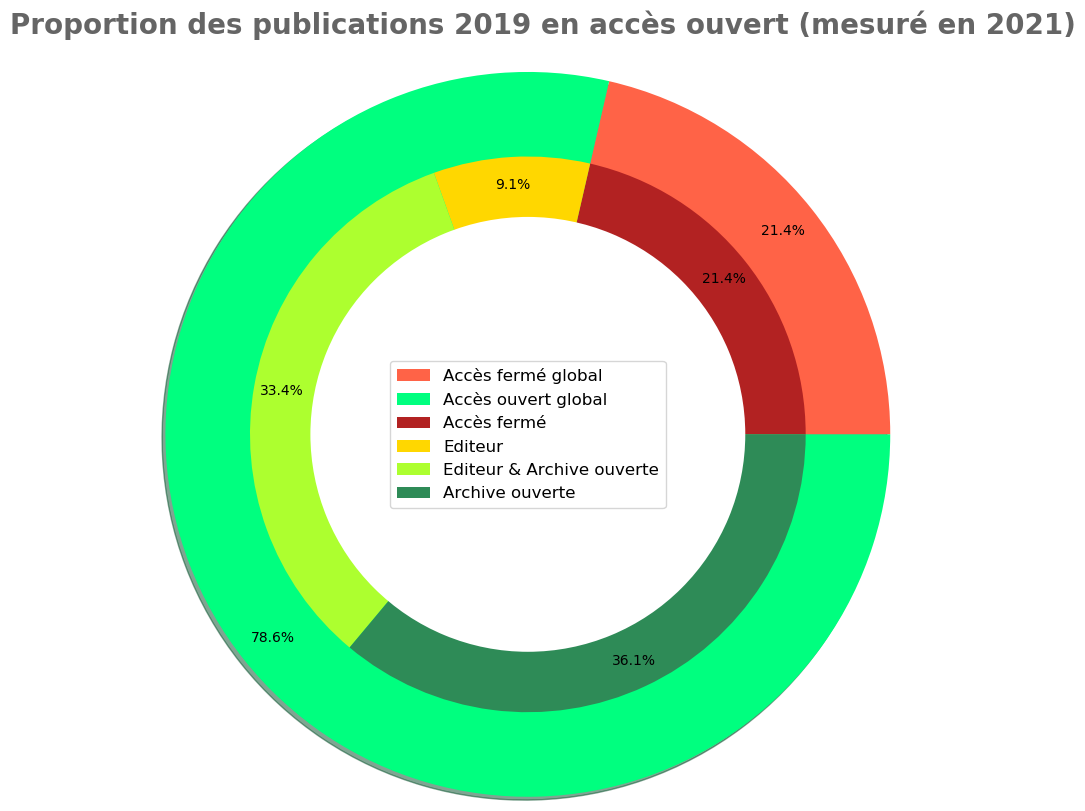

In [33]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.pie(oa_yes_no, labels=oa_yes_no.index, radius=3, labeldistance = None, colors=['tomato', 'springgreen'], autopct=lambda x: str(round(x, 1)) + '%', pctdistance = 0.9, shadow = True);
ax.pie(type_oa, labels=type_oa.index, radius=2.3, labeldistance = None, colors=['firebrick','gold','greenyellow','seagreen'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9);
ax.pie([1], radius=1.8, colors='white');
ax.legend(loc="center", fontsize = 12)
plt.title('Proportion des publications 2019 en accès ouvert (mesuré en 2021)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_proportion_publications_oa.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Il peut être intéressant d'identifier les publications publiées uniquement en accès ouvert "Editeur", pour ensuite déposer ces publications dans une archive ouverte. Pour cela, saisir le code ci-dessous.

In [34]:
publications_ouvertes_editeurs = pie_data.loc[(pie_data['oa_type'] == 'publisher')]

Capturer ensuite le résultat dans un fichier. Ici on va utiliser "to_excel" et pas "to_csv" afin d'obtenir un résultat directement lisible par l'humain.

In [35]:
publications_ouvertes_editeurs.to_excel("Data/outputs/publications_ouvertes_editeurs.xls", index=False)

### *Evolution du taux d'accès ouvert aux publications 2016-2020*

**Isoler les publications des années souhaitées**

Quelques publications d'autres années peuvent se glisser, si l'année est mal renseignée dans les bases de données. Il vaut mieux donc s'assurer que les bonnes années sont utilisées. <span style="color:red">**Pour mettre à jour ce graphique, il faut ajouter la nouvelle année et changer le nom de la variable. df_complete_20162020 devient par exemple df_complete20162021. Attention, il faudra penser à changer le nom de cette variable dans le reste du code.**</span>

In [36]:
df_complete_20162020 = df_complete.loc[(df_complete['published_year'] == 2016.0) | (df_complete['published_year'] == 2017.0) 
                                       | (df_complete['published_year'] == 2018.0) | (df_complete['published_year'] == 2019.0)
                                       | (df_complete['published_year'] == 2020.0),:]


# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)
df_complete_20162020.is_oa = df_complete_20162020.is_oa.astype(bool)

**Préparer les données pour chaque type d'accès ouvert**

Les différents types d'accès ouvert sont : 
- "Editeur" : publication en accès ouvert chez un éditeur uniquement
- "Editeur et Archive ouverte" : publication à la fois en accès ouvert chez un éditeur et en dépôt dans une archive ouverte
- "Archive ouverte" : publication en accès ouvert uniquement dans une archive ouverte

In [37]:
df_complete_20162020['oa_publisher_repository'] = df_complete_20162020.oa_type=='publisher;repository'
df_complete_20162020['oa_repository'] = df_complete_20162020.oa_type=='repository'
df_complete_20162020['oa_publisher'] = df_complete_20162020.oa_type=='publisher'
df_complete_20162020['oa_unk'] = df_complete_20162020.oa_type=='unknown'

**Définition du taux d'accès ouvert global par année**

In [38]:
df_oa_global_year = pd.DataFrame(df_complete_20162020.groupby(['published_year'])[['is_oa', 'oa_repository', 
                                                                                   'oa_publisher', 'oa_unk', 
                                                                                   'oa_publisher_repository']]
                                 .agg(['count', np.mean])).reset_index()
df_oa_global_year.columns = ['published_year', 'nb_doi', 'oa_mean', 'nbdoi1', 'oa_repository_mean', 'nb_doi2', 
                             'oa_publisher_mean', 'nb_doi3', 'oa_unk_mean', 'nb_doi4', 'oa_publisher_repository_mean']
df_oa_global_year['year_label'] = df_oa_global_year.apply(lambda x:"{}\n({} publications)".format(int(x.published_year), int(x.nb_doi)), 
                                                          axis=1)
df_oa_global_year = df_oa_global_year.sort_values(by='published_year', ascending=True)


**Réalisation du graphique**

Attention ici, lors de la mise à jour du graphique avec une année supplémentaire, il faut bien penser à modifier dans le code l'intervalle d'années choisi. Par exemple lors de l'ajout des données de 2021, il faudra remplacer :

for year_ix in range(0, 5):

par

for year_ix in range(0, 6):

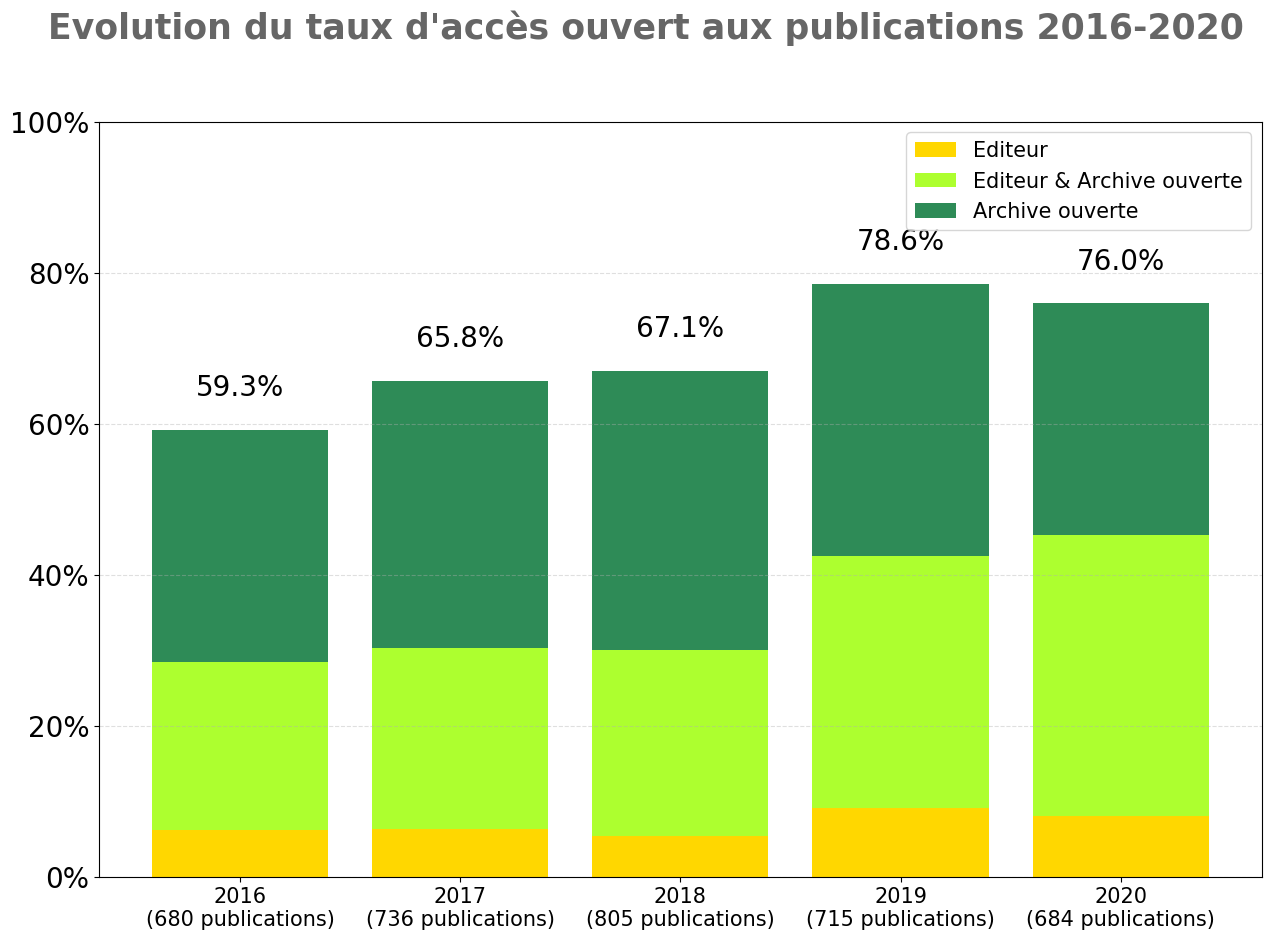

In [39]:
graph_type = 'poster'

if graph_type == 'poster':
    fig, (ax) = plt.subplots(figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
else:
    fig, (ax) = plt.subplots(figsize=(10, 12), dpi=100, facecolor='w', edgecolor='k')


years = df_oa_global_year.year_label.tolist()
y_pos = np.arange(len(years))

oa_publisher_repository_mean = df_oa_global_year.oa_publisher_repository_mean.tolist() 
oa_repository_mean = df_oa_global_year.oa_repository_mean.tolist() 
oa_publisher_mean = df_oa_global_year.oa_publisher_mean.tolist() 
oa_unk_mean = df_oa_global_year.oa_unk_mean.tolist()


oa_total_mean = list( map(lambda x,y: x+y, oa_publisher_repository_mean, oa_repository_mean))
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_publisher_mean)  )
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_unk_mean)  )     


rect1 = ax.bar(y_pos, oa_publisher_mean, align='center', alpha = 1.0, color='gold',
        ecolor='black', label="Editeur")

ax.bar(y_pos, oa_publisher_repository_mean, align='center', alpha = 1.0, color='greenyellow',
        bottom = oa_publisher_mean,
        ecolor='black', label="Editeur & Archive ouverte")

ax.bar(y_pos, oa_repository_mean, align='center',alpha = 1.0, color='seagreen',
       bottom = [oa_publisher_mean[i] + oa_publisher_repository_mean[i] for i in range(0, len(oa_publisher_mean))], 
         ecolor='black', label="Archive ouverte")


w = rect1[0].get_width()
# Lors de l'ajout (ou du retrait) d'une nouvelle année pendant la génération de ce graphique, penser à changer l'intervalle.
# Pour observer la période 2016-2020, il faudra remplacer range(0, 4) par range (O,5)
for year_ix in range(0, 5):
    ax.annotate("{:,.1%}".format(oa_total_mean[year_ix]),
                        xy=(year_ix , oa_total_mean[year_ix]),
                        xytext=(0, 20),  
                        size=20,
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_xticks(y_pos)
ax.set_xticklabels(years, fontsize = 15)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylim([0,1])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()], fontsize = 20)
# En cas de taux d'accès ouvert très important, il est préférable de changer la place de la légende pour plus de lisibilité :
# ax.legend(fontsize=15, loc='lower right')
ax.legend(fontsize=15)
ax.yaxis.grid(ls='--', alpha=0.4)

# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)

plt.title("Evolution du taux d'accès ouvert aux publications 2016-2020", fontsize = 25, x = 0.47, y = 1.1,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_evolution_oa_annees.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2019 par discipline (calculé en 2021)*

Les données du Baromètre n'étant pas encore mise à jour, le taux par discipline pour 2020 ne peut pas encore être visualisé.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2019**

In [40]:
publications_2019 = df_complete.loc[df_complete['published_year'] == 2019.0,:]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

In [41]:
publications_par_domaine = publications_2019['scientific_field'].value_counts().sort_index()
publications_par_domaine

Biology (fond.)                                 158
Chemistry                                        41
Computer and \n information sciences             73
Earth, Ecology, \nEnergy and applied biology    100
Engineering                                      29
Humanities                                       24
Mathematics                                      33
Medical research                                 57
Physical sciences, Astronomy                    154
Social sciences                                  37
unknown                                           9
Name: scientific_field, dtype: int64

In [42]:
df_oa_discipline_global = pd.crosstab([publications_2019['scientific_field']],publications_2019['oa_type'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global["Total"] = publications_par_domaine
# Traduction des disciplines en français
df_oa_discipline_global.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_global = df_oa_discipline_global.sort_values(by='closed', ascending=True)
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global["y_label"] = df_oa_discipline_global.index + "\n" + df_oa_discipline_global["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global.index = df_oa_discipline_global["y_label"]
df_oa_discipline_global

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Mathématiques\n33 publications,4,2,7,20,33,Mathématiques\n33 publications
unknown\n9 publications,5,0,0,4,9,unknown\n9 publications
Sciences de l'Ingénieur\n29 publications,6,3,7,13,29,Sciences de l'Ingénieur\n29 publications
Humanités\n24 publications,6,8,6,4,24,Humanités\n24 publications
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n100 publications",12,8,46,34,100,"Sciences de la Terre, Ecologie, \nEnergie et b..."
Chimie\n41 publications,13,5,11,12,41,Chimie\n41 publications
Sciences sociales\n37 publications,17,7,9,4,37,Sciences sociales\n37 publications
"Sciences physiques, astronomie\n154 publications",20,9,48,77,154,"Sciences physiques, astronomie\n154 publications"
Sciences médicales\n57 publications,21,6,19,11,57,Sciences médicales\n57 publications


Retirer la ligne des publications pour laquelle aucune discipline n'a pu être identifiée. Attention lors des mises à jour, le chiffre "n9 publications" peut changer.

In [43]:
df_oa_discipline_global = df_oa_discipline_global.drop('unknown\n9 publications')

**Convertir le résultat en pourcentages**

In [44]:
df_oa_discipline = pd.crosstab([publications_2019['scientific_field']],publications_2019['oa_type'])
df_oa_discipline = (df_oa_discipline.T / df_oa_discipline.T.sum()).mul(100).round(1)
df_oa_discipline = df_oa_discipline.T
df_oa_discipline["Total"] = publications_par_domaine
df_oa_discipline.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline["y_label"] = df_oa_discipline.index + "\n" + df_oa_discipline["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline.index = df_oa_discipline["y_label"]
df_oa_discipline = df_oa_discipline.sort_values(by='closed', ascending=True)
df_oa_discipline

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n100 publications",12.0,8.0,46.0,34.0,100,"Sciences de la Terre, Ecologie, \nEnergie et b..."
Mathématiques\n33 publications,12.1,6.1,21.2,60.6,33,Mathématiques\n33 publications
"Sciences physiques, astronomie\n154 publications",13.0,5.8,31.2,50.0,154,"Sciences physiques, astronomie\n154 publications"
Biologie (fond.)\n158 publications,17.1,8.2,44.9,29.7,158,Biologie (fond.)\n158 publications
Sciences de l'Ingénieur\n29 publications,20.7,10.3,24.1,44.8,29,Sciences de l'Ingénieur\n29 publications
Humanités\n24 publications,25.0,33.3,25.0,16.7,24,Humanités\n24 publications
Informatique\n73 publications,30.1,5.5,20.5,43.8,73,Informatique\n73 publications
Chimie\n41 publications,31.7,12.2,26.8,29.3,41,Chimie\n41 publications
Sciences médicales\n57 publications,36.8,10.5,33.3,19.3,57,Sciences médicales\n57 publications


In [45]:
df_oa_discipline = df_oa_discipline.drop('unknown\n9 publications')

**Générer le graphique**

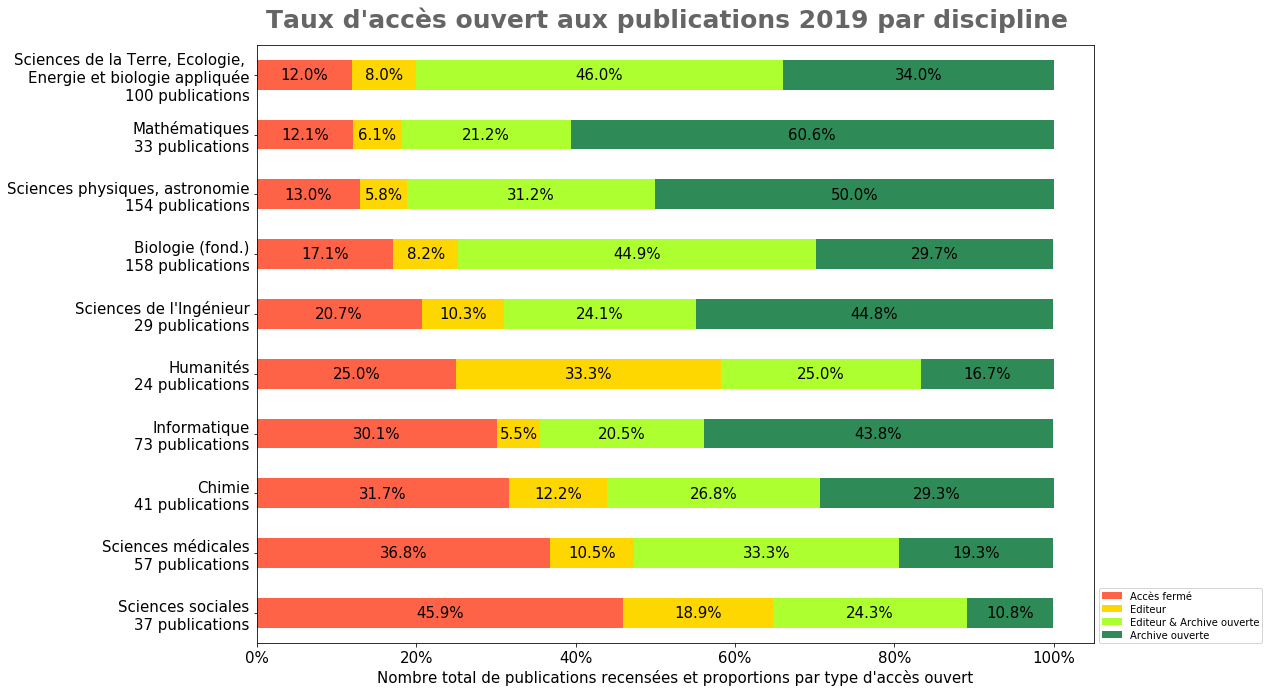

In [46]:
import matplotlib.ticker as mtick

ax = df_oa_discipline.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline.columns:
    for i in df_oa_discipline.index:
        label = str(df_oa_discipline.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2019 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_taux_type_oa_discipline.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Variante du code pour les établissements travaillant sur de petits jeux de données :

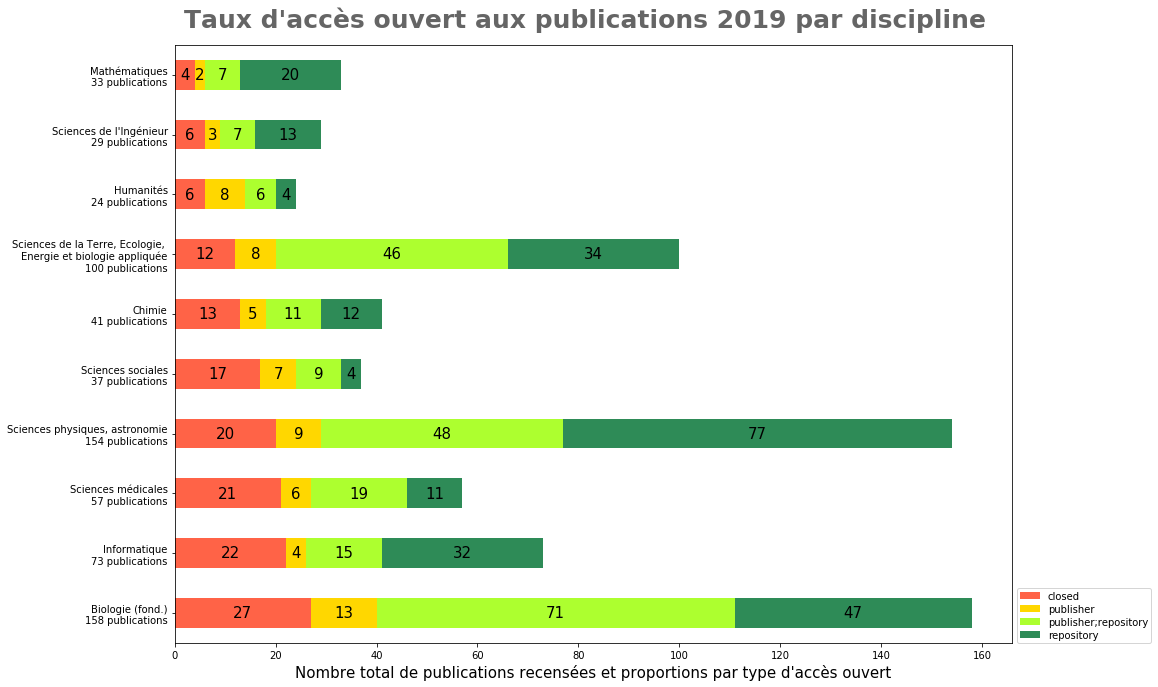

In [47]:
ax = df_oa_discipline_global.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','gold','greenyellow','seagreen'])

labels = []
for j in df_oa_discipline_global.columns:
    for i in df_oa_discipline_global.index:
        label = str(df_oa_discipline_global.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 15)

plt.gca().invert_yaxis()
plt.legend(    loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
            borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2019 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_taux_type_oa_discipline_en_nb_total.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications 2020 par éditeur / préfixe DOI (calculé en 2021)*

Le Baromètre du Mnistère montre le taux d'accès ouvert aux publications par éditeur, ce qui a du sens au niveau national. Mais au niveau local, il semble plus judicieux de regarder auprès de quels éditeurs publient en majorité les chercheurs, puis de regarder ces éditeurs de plus près.

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title. Attention, il faudra mettre la nouvelle année à jour partout dans le code.**</span>

**Isoler les publications de l'année 2019**

In [48]:
publications_2019 = df_complete.loc[df_complete['published_year'] == 2019.0,:]

**Voir quels sont les 20 éditeurs majoritaires au sein de la production de l'Université de Toulon**

In [49]:
publications_par_editeur = publications_2019['publisher'].value_counts().iloc[0:20]
publications_par_editeur

Elsevier BV                                                 164
Springer Science and Business Media LLC                     102
Wiley                                                        37
American Physical Society (APS)                              30
MDPI AG                                                      28
Informa UK Limited                                           25
Frontiers Media SA                                           20
IOP Publishing                                               19
American Chemical Society (ACS)                              19
EDP Sciences                                                 17
Institute of Electrical and Electronics Engineers (IEEE)     16
OpenEdition                                                  15
Springer International Publishing                            14
American Geophysical Union (AGU)                             12
CAIRN                                                        11
Royal Society of Chemistry (RSC)        

In [50]:
publications_par_editeur.index

Index(['Elsevier BV', 'Springer Science and Business Media LLC', 'Wiley',
       'American Physical Society (APS)', 'MDPI AG', 'Informa UK Limited',
       'Frontiers Media SA', 'IOP Publishing',
       'American Chemical Society (ACS)', 'EDP Sciences',
       'Institute of Electrical and Electronics Engineers (IEEE)',
       'OpenEdition', 'Springer International Publishing',
       'American Geophysical Union (AGU)', 'CAIRN',
       'Royal Society of Chemistry (RSC)', 'IEEE', 'Emerald',
       'Copernicus GmbH', 'SAGE Publications'],
      dtype='object')

Copier-coller la liste des éditeurs choisis :

In [51]:
filter = ['Elsevier BV', 'Springer Science and Business Media LLC', 'Wiley',
       'American Physical Society (APS)', 'MDPI AG', 'Informa UK Limited',
       'Frontiers Media SA', 'American Chemical Society (ACS)',
       'IOP Publishing', 'EDP Sciences',
       'Institute of Electrical and Electronics Engineers (IEEE)',
       'OpenEdition', 'Springer International Publishing',
       'American Geophysical Union (AGU)', 'CAIRN',
       'Royal Society of Chemistry (RSC)', 'Emerald', 'IEEE',
       'Copernicus GmbH', 'SAGE Publications'] 

editeurs_2019 = publications_2019[publications_2019['publisher'].isin(filter)]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par éditeur dans l'année ?**

In [52]:
df_oa_editeur_global = pd.crosstab([editeurs_2019['publisher']],editeurs_2019['oa_type'])
df_oa_editeur_global["Total"] = publications_par_editeur

# Renommer la colonne des éditeurs
df_oa_editeur_global = df_oa_editeur_global.rename_axis('editeurs')
df_oa_editeur_global

oa_type,closed,publisher,publisher;repository,repository,Total
editeurs,,,,,
American Chemical Society (ACS),5,0,5,9,19
American Geophysical Union (AGU),1,0,3,8,12
American Physical Society (APS),2,0,7,21,30
CAIRN,9,0,0,2,11
Copernicus GmbH,0,0,6,1,7
EDP Sciences,0,1,12,4,17
Elsevier BV,33,21,56,54,164
Emerald,6,1,0,3,10
Frontiers Media SA,0,0,20,0,20


In [53]:
df_oa_editeur_global["y_label"] = df_oa_editeur_global.index + " - " + df_oa_editeur_global["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur_global.index = df_oa_editeur_global["y_label"]
df_oa_editeur_global = df_oa_editeur_global.sort_values(by='closed', ascending=True)
df_oa_editeur_global

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Copernicus GmbH - 7 publications,0,0,6,1,7,Copernicus GmbH - 7 publications
EDP Sciences - 17 publications,0,1,12,4,17,EDP Sciences - 17 publications
Frontiers Media SA - 20 publications,0,0,20,0,20,Frontiers Media SA - 20 publications
MDPI AG - 28 publications,0,3,25,0,28,MDPI AG - 28 publications
American Geophysical Union (AGU) - 12 publications,1,0,3,8,12,American Geophysical Union (AGU) - 12 publicat...
American Physical Society (APS) - 30 publications,2,0,7,21,30,American Physical Society (APS) - 30 publications
SAGE Publications - 6 publications,2,0,0,4,6,SAGE Publications - 6 publications
OpenEdition - 15 publications,2,8,4,1,15,OpenEdition - 15 publications
IOP Publishing - 19 publications,3,2,4,10,19,IOP Publishing - 19 publications


**Convertir le résultat en pourcentages**

In [54]:
df_oa_editeur = pd.crosstab([editeurs_2019['publisher']],editeurs_2019['oa_type'])
df_oa_editeur = (df_oa_editeur.T / df_oa_editeur.T.sum()).mul(100).round(1)
df_oa_editeur = df_oa_editeur.T
df_oa_editeur["Total"] = publications_par_editeur
df_oa_editeur["y_label"] = df_oa_editeur.index + " - " + df_oa_editeur["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur.index = df_oa_editeur["y_label"]
df_oa_editeur = df_oa_editeur.sort_values(by='closed', ascending=True)
df_oa_editeur

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Copernicus GmbH - 7 publications,0.0,0.0,85.7,14.3,7,Copernicus GmbH - 7 publications
EDP Sciences - 17 publications,0.0,5.9,70.6,23.5,17,EDP Sciences - 17 publications
Frontiers Media SA - 20 publications,0.0,0.0,100.0,0.0,20,Frontiers Media SA - 20 publications
MDPI AG - 28 publications,0.0,10.7,89.3,0.0,28,MDPI AG - 28 publications
American Physical Society (APS) - 30 publications,6.7,0.0,23.3,70.0,30,American Physical Society (APS) - 30 publications
American Geophysical Union (AGU) - 12 publications,8.3,0.0,25.0,66.7,12,American Geophysical Union (AGU) - 12 publicat...
OpenEdition - 15 publications,13.3,53.3,26.7,6.7,15,OpenEdition - 15 publications
Springer Science and Business Media LLC - 102 publications,13.7,2.9,37.3,46.1,102,Springer Science and Business Media LLC - 102 ...
IOP Publishing - 19 publications,15.8,10.5,21.1,52.6,19,IOP Publishing - 19 publications


**Générer le graphique**

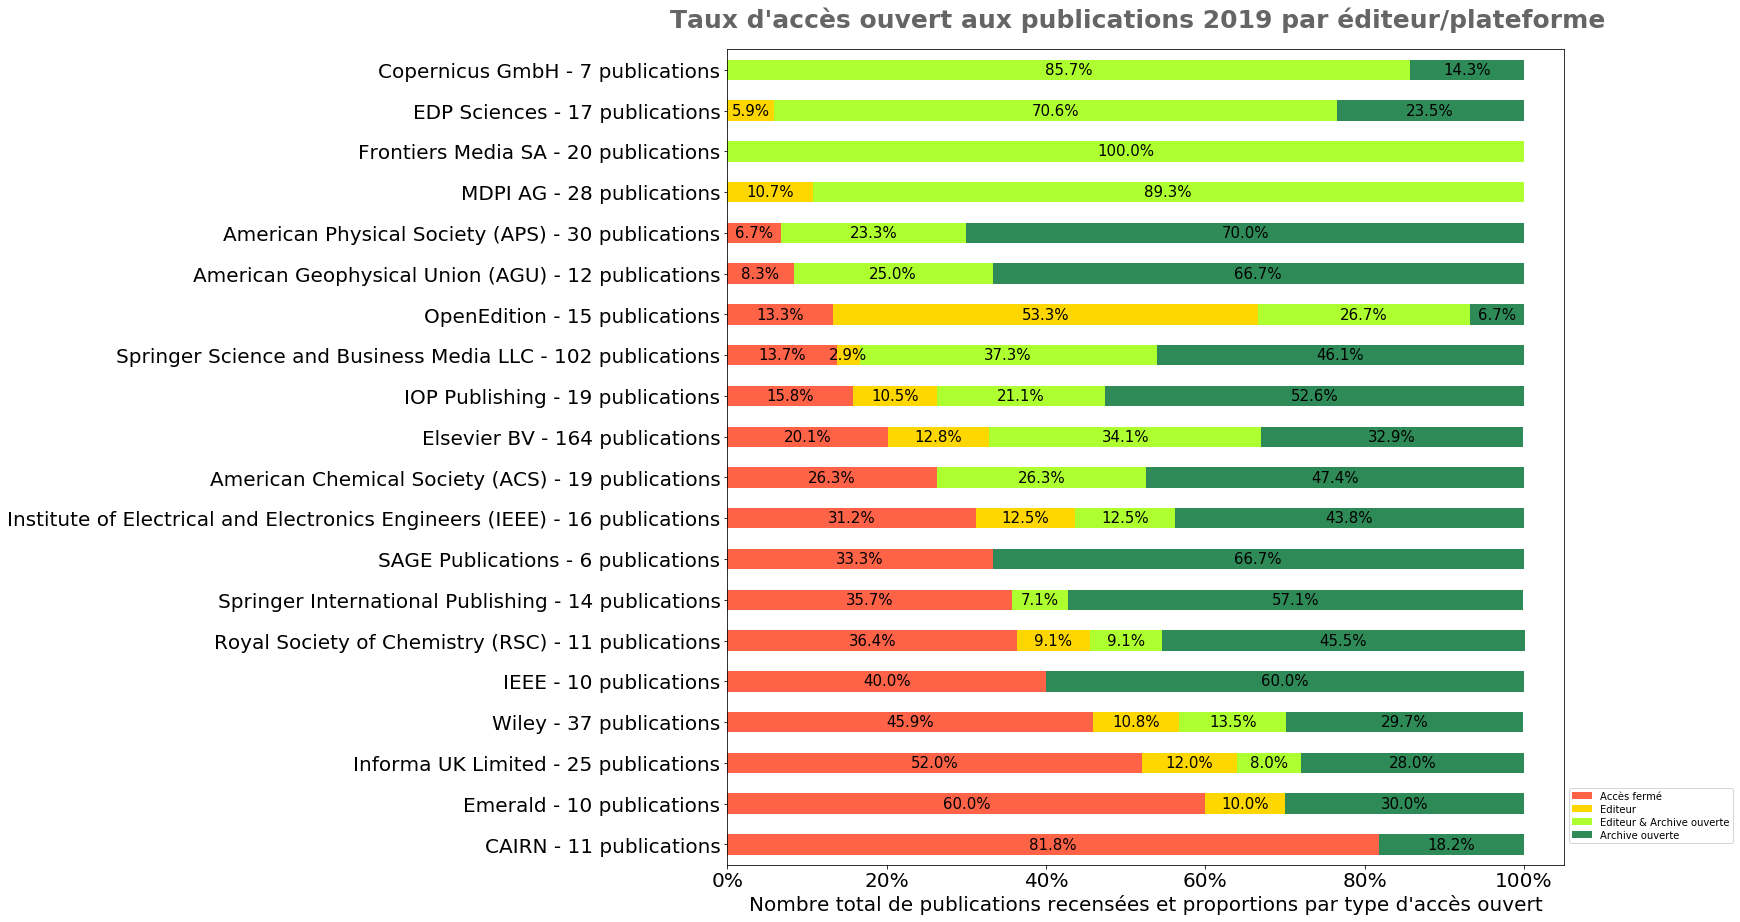

In [55]:
import matplotlib.ticker as mtick

ax = df_oa_editeur.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 15), color=['tomato','gold','greenyellow','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_editeur.columns:
    for i in df_oa_editeur.index:
        label = str(df_oa_editeur.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)
        
plt.gca().invert_yaxis()

plt.tick_params(axis = 'both', labelsize = 20)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=20)  
plt.ylabel(None, fontsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2019 par éditeur/plateforme", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_taux_type_oa_editeur.png', dpi=100, bbox_inches='tight', pad_inches=0.9)


Variante du code pour des établissements travaillant avec de petits jeux de données (n'est pas pertinent pour les grands jeux de données comme celui de l'Université de Toulon) :

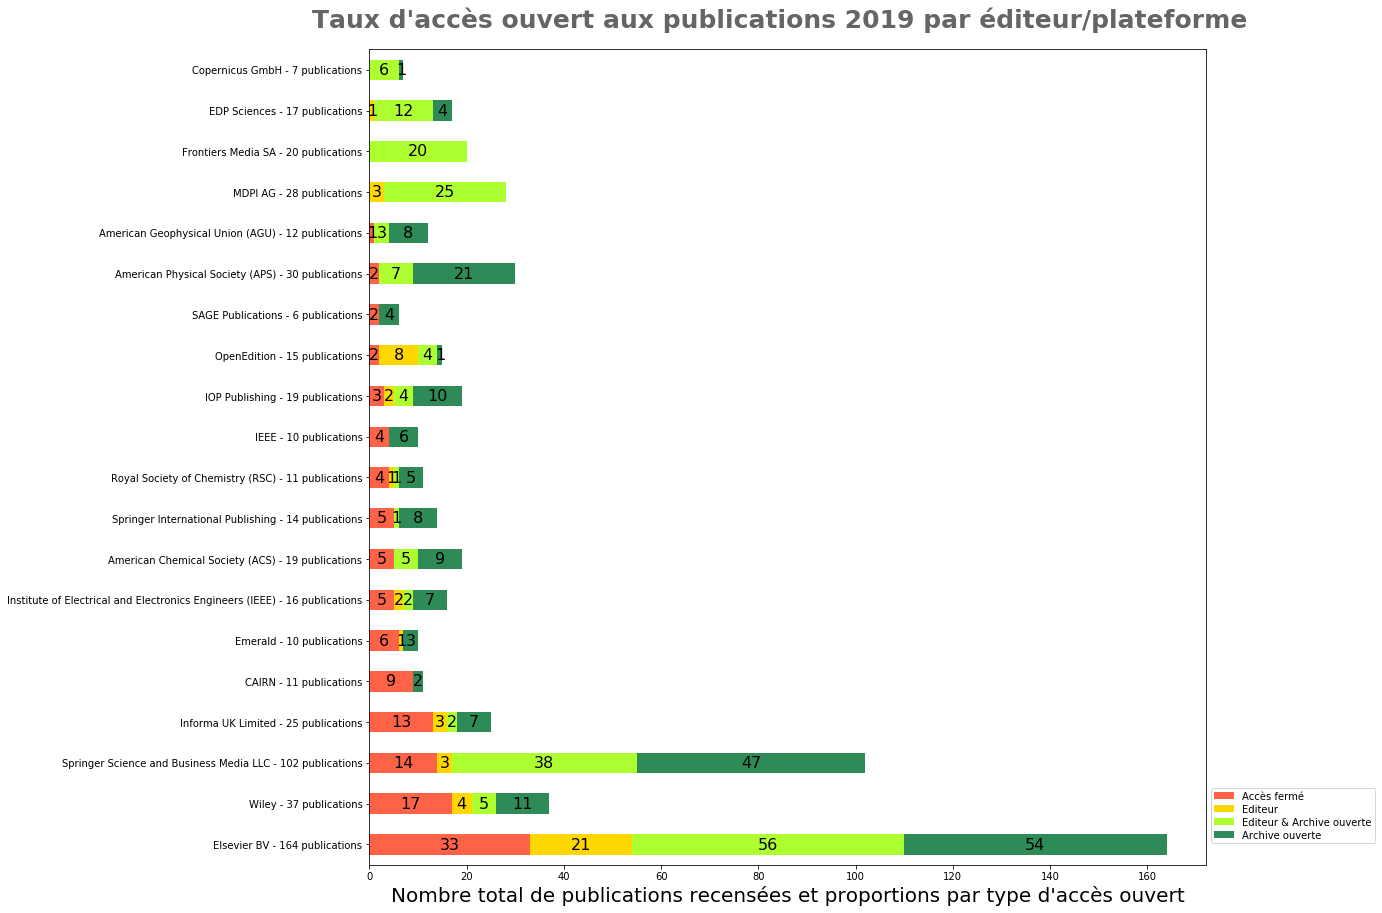

In [56]:
ax = df_oa_editeur_global.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 15), color=['tomato','gold','greenyellow','seagreen'])

labels = []
for j in df_oa_editeur_global.columns:
    for i in df_oa_editeur_global.index:
        label = str(df_oa_editeur_global.loc[i][j])
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=16)
        
plt.gca().invert_yaxis()

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=20)  
plt.ylabel(None, fontsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2019 par éditeur/plateforme", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_taux_type_oa_editeur_en_nb_total.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Répartition des publications 2019 par type de publication et type d'accès (mesuré en 2020)*

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

**Isoler les publications 2019**

In [57]:
publications_2019 = df_complete.loc[df_complete['published_year'] == 2019.0,:]

**Trier les publications par type de publication et par accès, ouvert ou fermé**

In [58]:
df_oa_by_type = pd.crosstab([publications_2019['is_oa']],publications_2019['genre'])
df_oa_by_type = df_oa_by_type.rename({'False': 'Accès fermé', 'True' : "Accès ouvert"})
df_oa_by_type

genre,book-chapter,journal-article,other,posted-content,proceedings-article
is_oa,,,,,
False,6,133,4,0,10
True,10,535,1,5,11


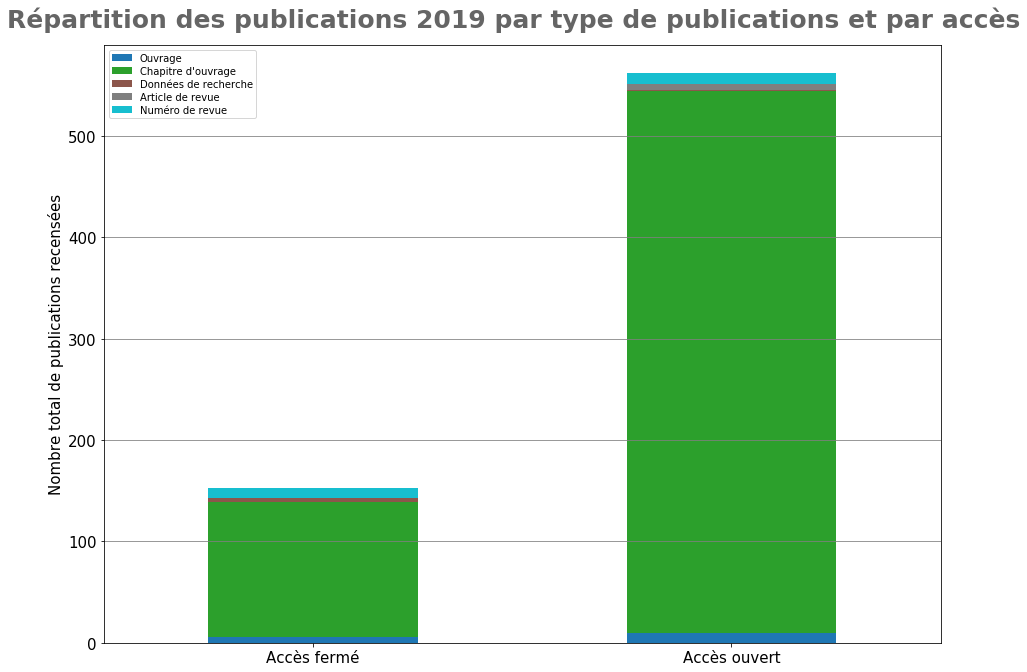

In [59]:
ax = df_oa_by_type.plot(kind="bar", stacked=True, figsize=(15, 11), rot=0, colormap = "tab10")

# Les couleurs ci-dessus peuvent être changées en choisissant parmi les codes suivants : http://www.python-simple.com/img/img44.png

ax.set_xticklabels(('Accès fermé', 'Accès ouvert'))

plt.xlabel(None)  
plt.ylabel("Nombre total de publications recensées", fontsize=15)

axes = plt.gca()

plt.gca().yaxis.grid(True, which = 'both', color = 'gray', zorder = 0)
plt.tick_params(axis = 'both', labelsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Ouvrage", "Chapitre d'ouvrage"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(["Ouvrage", "Chapitre d'ouvrage", "Données de recherche", "Article de revue", "Numéro de revue", "Monographie"
           , "Pré-publication", "Acte de congrès", "Article d'actes de congrès", "Référence"],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3)


plt.title("Répartition des publications 2019 par type de publications et par accès", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/2019_taux_type_oa_type.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Nombre de publications 2019 hébergées par des archives ouvertes (mesuré en 2021)*

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

**Isoler les publications 2019**

In [60]:
publications_2019 = df_complete.loc[df_complete['published_year'] == 2019.0,:]

**Isoler les publications en accès ouvert**

In [61]:
publis_en_oa = publications_2019.loc[publications_2019['is_oa'] == True,:]

**Trier les publications ouvertes par archives ouvertes**

In [62]:
publis_par_ao = pd.crosstab([publis_en_oa['repositories']],publis_en_oa['is_oa'])

Pour plus de lisibilité, restreindre aux 15 plateformes majoritaires dans le corpus.

In [63]:
publis_par_ao = publis_en_oa['repositories'].value_counts().iloc[0:15]
publis_par_ao

HAL                                                                182
arxiv.org                                                           44
HAL;arxiv.org                                                       43
HAL;archimer.ifremer.fr                                             20
HAL;europepmc.org;www.ncbi.nlm.nih.gov                              20
europepmc.org;www.ncbi.nlm.nih.gov                                  10
HAL;pdfs.semanticscholar.org                                         4
archimer.ifremer.fr                                                  4
HAL;digital.csic.es                                                  4
HAL;archimer.ifremer.fr;europepmc.org;www.ncbi.nlm.nih.gov           4
pdfs.semanticscholar.org                                             3
ddd.uab.cat                                                          3
HAL;europepmc.org;pdfs.semanticscholar.org;www.ncbi.nlm.nih.gov      3
www.biorxiv.org                                                      2
HAL;ww

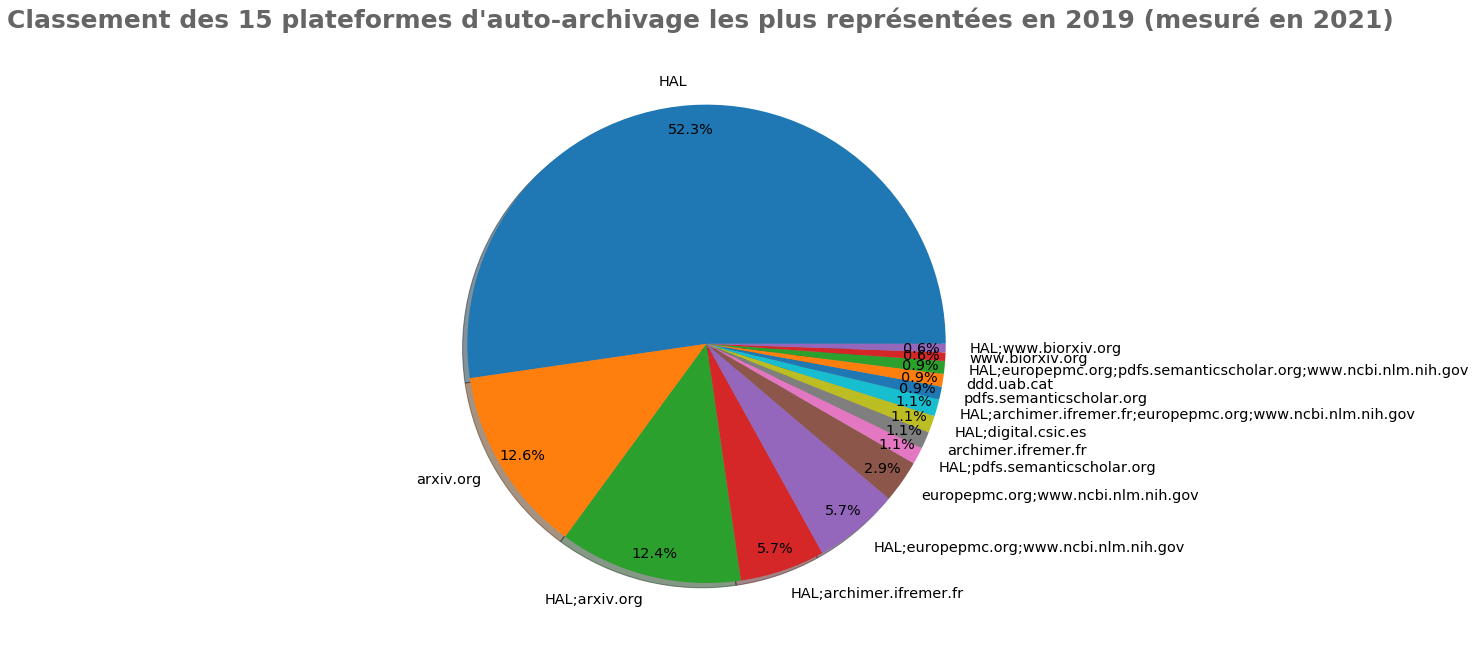

In [64]:
ax = publis_par_ao.plot(kind="pie", figsize=(15, 11), autopct=lambda x: str(round(x, 1)) + '%',
                       pctdistance = 0.9, shadow = True, fontsize = 14.5)
plt.title("Classement des 15 plateformes d'auto-archivage les plus représentées en 2019 (mesuré en 2021)", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.ylabel(None)
plt.savefig('Data/outputs/2019_nb_publis_dans_ao.png', dpi=100, bbox_inches='tight', pad_inches=0.9)